In [21]:
import pandas 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
from tqdm import tqdm


In [22]:
train_path = '../input/train.csv'
train = pandas.read_csv(train_path)
test_path = '../input/test.csv'
test = pandas.read_csv(test_path)

In [27]:
mean_diff = train[train.target==1].mean() - train[train.target==0].mean()

In [30]:
mean_diff.values

array([ 1.00000000e+00,  5.29737062e-01,  6.78156838e-01,  4.90757415e-01,
        7.51342934e-02,  5.89253785e-02,  8.10213862e-01,  1.92346128e-01,
       -3.43885759e-02,  2.17084823e-01, -1.75843213e-01, -4.04940497e-02,
        4.56590462e-01, -4.39279861e-02, -8.51145767e-01, -4.73433956e-02,
        2.36665757e-02,  6.90423918e-02,  1.92841847e-02,  1.13542880e+00,
        3.00315461e-01, -3.58239642e-01, -1.59438796e+00,  5.73644236e-01,
       -4.46415242e-02,  3.57775205e-01,  1.26580250e-02,  1.22958145e+00,
       -2.94903611e-03, -6.23828046e-02,  4.07366674e-02,  1.69009913e-02,
       -1.84044549e-01,  2.62639109e-01, -6.37364919e-01, -9.49227028e-02,
        6.29968313e-01, -3.98454413e-01,  5.75018811e-02,  1.38016096e-02,
       -5.53568621e-02,  1.36394402e+00, -2.56283551e-02, -1.93654802e-02,
       -2.94063797e-02, -9.62847927e-01, -1.42853315e+00,  5.41411773e-02,
        3.16120220e-01,  1.22435323e+00,  7.99848824e-01, -3.19801186e-02,
        7.07819736e-01,  

In [ ]:
std_diff = train[train.target==1].std() - train[train.target==0].std()

In [3]:
y = train.target
train = train.drop('target',axis = 1)

In [4]:
ID_code = train.ID_code
train = train.drop('ID_code',axis=1)

In [5]:
ID_code = test.ID_code
test = test.drop('ID_code',axis=1)

In [6]:
train.shape

(200000, 200)

In [8]:
train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
mean = train.mean()
std = train.std()
mean,std

(var_0      10.679914
 var_1      -1.627622
 var_2      10.715192
 var_3       6.796529
 var_4      11.078333
 var_5      -5.065317
 var_6       5.408949
 var_7      16.545850
 var_8       0.284162
 var_9       7.567236
 var_10      0.394340
 var_11     -3.245596
 var_12     14.023978
 var_13      8.530232
 var_14      7.537606
 var_15     14.573126
 var_16      9.333264
 var_17     -5.696731
 var_18     15.244013
 var_19     12.438567
 var_20     13.290894
 var_21     17.257883
 var_22      4.305430
 var_23      3.019540
 var_24     10.584400
 var_25     13.667496
 var_26     -4.055133
 var_27     -1.137908
 var_28      5.532980
 var_29      5.053874
              ...    
 var_170    -0.004962
 var_171    -0.831777
 var_172    19.817094
 var_173    -0.677967
 var_174    20.210677
 var_175    11.640613
 var_176    -2.799585
 var_177    11.882933
 var_178    -1.014064
 var_179     2.591444
 var_180    -2.741666
 var_181    10.085518
 var_182     0.719109
 var_183     8.769088
 var_184  

In [11]:
train =  (train-mean)/std

In [12]:
test =  (test-mean)/std

In [13]:
train.loc['target':1]

SyntaxError: invalid syntax (<ipython-input-13-89d5ee0a14c1>, line 1)

In [14]:
X_val = train[:10000]
y_val = y[:10000]
X = train[10000:]
y = y[10000:]


In [15]:
# initialize data

test_data = catboost_pool = Pool(X_val, 
                                     y_val)


(190000, 200)

In [63]:
for x in [5,6,7,8,9,10]:
    pass

Learning rate set to 0.5
0:	learn: 0.3925908	total: 65.9ms	remaining: 6.53s
1:	learn: 0.3282447	total: 124ms	remaining: 6.06s
2:	learn: 0.3111146	total: 179ms	remaining: 5.79s
3:	learn: 0.3031512	total: 237ms	remaining: 5.69s
4:	learn: 0.2982553	total: 297ms	remaining: 5.64s
5:	learn: 0.2932133	total: 354ms	remaining: 5.55s
6:	learn: 0.2883423	total: 409ms	remaining: 5.44s
7:	learn: 0.2840319	total: 464ms	remaining: 5.34s
8:	learn: 0.2803442	total: 522ms	remaining: 5.28s
9:	learn: 0.2769127	total: 589ms	remaining: 5.3s
10:	learn: 0.2739289	total: 650ms	remaining: 5.26s
11:	learn: 0.2710585	total: 708ms	remaining: 5.19s
12:	learn: 0.2681341	total: 780ms	remaining: 5.22s
13:	learn: 0.2655367	total: 841ms	remaining: 5.16s
14:	learn: 0.2631246	total: 899ms	remaining: 5.09s
15:	learn: 0.2610044	total: 952ms	remaining: 5s
16:	learn: 0.2587516	total: 1.03s	remaining: 5.01s
17:	learn: 0.2568681	total: 1.08s	remaining: 4.92s
18:	learn: 0.2548813	total: 1.14s	remaining: 4.86s
19:	learn: 0.252852

100%|██████████| 1000/1000 [00:02<00:00, 486.28it/s]


Probability threshold maximizing CV F1-score for each class:
[0.107] 0.7945256482264674
Learning rate set to 0.5
0:	learn: 0.3924336	total: 88.8ms	remaining: 8.79s
1:	learn: 0.3300290	total: 159ms	remaining: 7.79s
2:	learn: 0.3111379	total: 224ms	remaining: 7.25s
3:	learn: 0.3022869	total: 285ms	remaining: 6.83s
4:	learn: 0.2946595	total: 352ms	remaining: 6.68s
5:	learn: 0.2890516	total: 415ms	remaining: 6.5s
6:	learn: 0.2842441	total: 475ms	remaining: 6.32s
7:	learn: 0.2793388	total: 542ms	remaining: 6.24s
8:	learn: 0.2748623	total: 625ms	remaining: 6.32s
9:	learn: 0.2715456	total: 708ms	remaining: 6.37s
10:	learn: 0.2682368	total: 794ms	remaining: 6.43s
11:	learn: 0.2655367	total: 875ms	remaining: 6.42s
12:	learn: 0.2624452	total: 956ms	remaining: 6.4s
13:	learn: 0.2597952	total: 1.03s	remaining: 6.36s
14:	learn: 0.2571403	total: 1.11s	remaining: 6.31s
15:	learn: 0.2550264	total: 1.19s	remaining: 6.27s
16:	learn: 0.2524968	total: 1.28s	remaining: 6.24s
17:	learn: 0.2501962	total: 1.3

  0%|          | 0/1000 [00:00<?, ?it/s]

99:	learn: 0.1929266	total: 8.02s	remaining: 0us


100%|██████████| 1000/1000 [00:02<00:00, 482.08it/s]


Probability threshold maximizing CV F1-score for each class:
[0.093] 0.8008256065372917
Learning rate set to 0.5
0:	learn: 0.3912174	total: 114ms	remaining: 11.3s
1:	learn: 0.3266396	total: 193ms	remaining: 9.45s
2:	learn: 0.3060101	total: 273ms	remaining: 8.81s
3:	learn: 0.2964981	total: 368ms	remaining: 8.84s
4:	learn: 0.2886644	total: 457ms	remaining: 8.69s
5:	learn: 0.2827398	total: 549ms	remaining: 8.6s
6:	learn: 0.2775173	total: 647ms	remaining: 8.6s
7:	learn: 0.2733919	total: 743ms	remaining: 8.54s
8:	learn: 0.2693728	total: 835ms	remaining: 8.44s
9:	learn: 0.2657484	total: 934ms	remaining: 8.41s
10:	learn: 0.2623281	total: 1.03s	remaining: 8.33s
11:	learn: 0.2597168	total: 1.13s	remaining: 8.3s
12:	learn: 0.2567168	total: 1.24s	remaining: 8.29s
13:	learn: 0.2536173	total: 1.34s	remaining: 8.26s
14:	learn: 0.2509994	total: 1.45s	remaining: 8.22s
15:	learn: 0.2485020	total: 1.56s	remaining: 8.19s
16:	learn: 0.2459944	total: 1.69s	remaining: 8.24s
17:	learn: 0.2438703	total: 1.8s	

100%|██████████| 1000/1000 [00:02<00:00, 488.13it/s]


Probability threshold maximizing CV F1-score for each class:
[0.096] 0.7954220995526792
Learning rate set to 0.5
0:	learn: 0.3909915	total: 173ms	remaining: 17.1s
1:	learn: 0.3230328	total: 317ms	remaining: 15.5s
2:	learn: 0.3031088	total: 447ms	remaining: 14.4s
3:	learn: 0.2922736	total: 592ms	remaining: 14.2s
4:	learn: 0.2850552	total: 746ms	remaining: 14.2s
5:	learn: 0.2791261	total: 893ms	remaining: 14s
6:	learn: 0.2737622	total: 1.02s	remaining: 13.6s
7:	learn: 0.2688329	total: 1.19s	remaining: 13.6s
8:	learn: 0.2641806	total: 1.36s	remaining: 13.7s
9:	learn: 0.2603454	total: 1.51s	remaining: 13.6s
10:	learn: 0.2569832	total: 1.67s	remaining: 13.5s
11:	learn: 0.2534877	total: 1.8s	remaining: 13.2s
12:	learn: 0.2502101	total: 1.96s	remaining: 13.1s
13:	learn: 0.2474084	total: 2.13s	remaining: 13.1s
14:	learn: 0.2446218	total: 2.3s	remaining: 13s
15:	learn: 0.2420213	total: 2.46s	remaining: 12.9s
16:	learn: 0.2397214	total: 2.62s	remaining: 12.8s
17:	learn: 0.2374210	total: 2.8s	rem

100%|██████████| 1000/1000 [00:02<00:00, 475.11it/s]


Probability threshold maximizing CV F1-score for each class:
[0.084] 0.7929639797479078
Learning rate set to 0.5
0:	learn: 0.3892630	total: 270ms	remaining: 26.7s
1:	learn: 0.3226445	total: 478ms	remaining: 23.4s
2:	learn: 0.3003671	total: 668ms	remaining: 21.6s
3:	learn: 0.2897111	total: 874ms	remaining: 21s
4:	learn: 0.2818039	total: 1.07s	remaining: 20.3s
5:	learn: 0.2757134	total: 1.3s	remaining: 20.4s
6:	learn: 0.2701114	total: 1.49s	remaining: 19.9s
7:	learn: 0.2649256	total: 1.71s	remaining: 19.6s
8:	learn: 0.2611006	total: 1.93s	remaining: 19.5s
9:	learn: 0.2566044	total: 2.15s	remaining: 19.3s
10:	learn: 0.2523112	total: 2.39s	remaining: 19.4s
11:	learn: 0.2489147	total: 2.59s	remaining: 19s
12:	learn: 0.2446619	total: 2.82s	remaining: 18.9s
13:	learn: 0.2413273	total: 3.02s	remaining: 18.6s
14:	learn: 0.2380852	total: 3.25s	remaining: 18.4s
15:	learn: 0.2353474	total: 3.48s	remaining: 18.3s
16:	learn: 0.2329259	total: 3.69s	remaining: 18s
17:	learn: 0.2305160	total: 3.9s	rema

  0%|          | 0/1000 [00:00<?, ?it/s]

99:	learn: 0.1493710	total: 22.9s	remaining: 0us


100%|██████████| 1000/1000 [00:02<00:00, 450.94it/s]


Probability threshold maximizing CV F1-score for each class:
[0.068] 0.7848630758568735
Learning rate set to 0.5
0:	learn: 0.3885042	total: 789ms	remaining: 1m 18s
1:	learn: 0.3199038	total: 1.39s	remaining: 1m 8s
2:	learn: 0.2970394	total: 2.03s	remaining: 1m 5s
3:	learn: 0.2851256	total: 2.6s	remaining: 1m 2s
4:	learn: 0.2762996	total: 3.18s	remaining: 1m
5:	learn: 0.2692829	total: 3.76s	remaining: 58.9s
6:	learn: 0.2632177	total: 4.35s	remaining: 57.8s
7:	learn: 0.2584506	total: 4.99s	remaining: 57.3s
8:	learn: 0.2527190	total: 5.58s	remaining: 56.4s
9:	learn: 0.2481878	total: 6.15s	remaining: 55.4s
10:	learn: 0.2439303	total: 6.75s	remaining: 54.6s
11:	learn: 0.2401429	total: 7.38s	remaining: 54.1s
12:	learn: 0.2365754	total: 7.92s	remaining: 53s
13:	learn: 0.2330434	total: 8.53s	remaining: 52.4s
14:	learn: 0.2300772	total: 9.13s	remaining: 51.8s
15:	learn: 0.2271742	total: 9.72s	remaining: 51s
16:	learn: 0.2244170	total: 10.3s	remaining: 50.5s
17:	learn: 0.2218885	total: 11s	remai

  0%|          | 0/1000 [00:00<?, ?it/s]

99:	learn: 0.1274170	total: 59.6s	remaining: 0us


100%|██████████| 1000/1000 [00:02<00:00, 483.37it/s]


Probability threshold maximizing CV F1-score for each class:
[0.06] 0.7773025003228342
roc_aucs =  [0.79452565 0.80082561 0.7954221  0.79296398 0.78486308 0.7773025 ]


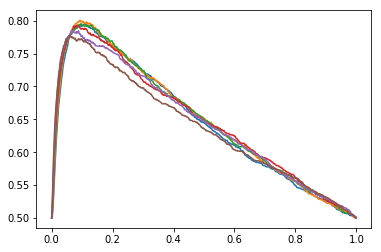

In [64]:
models = np.array([])
roc_aucs = np.array([])

for depth in [5,6,7,8,9,10]:
    model = CatBoostClassifier(iterations=100, 
                       depth=depth, 
                       #learning_rate=lr, 
                       loss_function='Logloss', 
                       #logging_level='Verbose'
                    )
    #train the model
    model.fit(X, y)
    preds_proba = model.predict_proba(test_data)
    val_pred= np.array(preds_proba)[:,1]
    roc_aucs=np.append(roc_aucs,roc_auc_calc(val_pred))
    models=np.append(models,model)
# # make the prediction using the resulting model
# preds_class = model.predict(test_data)
# preds_proba = model.predict_proba(test_data)
print("roc_aucs = ", roc_aucs)


0:	learn: 0.3924336	total: 84.6ms	remaining: 16.8s
1:	learn: 0.3300290	total: 154ms	remaining: 15.2s
2:	learn: 0.3111379	total: 219ms	remaining: 14.4s
3:	learn: 0.3022869	total: 279ms	remaining: 13.6s
4:	learn: 0.2946595	total: 354ms	remaining: 13.8s
5:	learn: 0.2890516	total: 417ms	remaining: 13.5s
6:	learn: 0.2842441	total: 478ms	remaining: 13.2s
7:	learn: 0.2793388	total: 539ms	remaining: 12.9s
8:	learn: 0.2748623	total: 613ms	remaining: 13s
9:	learn: 0.2715456	total: 679ms	remaining: 12.9s
10:	learn: 0.2682368	total: 747ms	remaining: 12.8s
11:	learn: 0.2655367	total: 808ms	remaining: 12.7s
12:	learn: 0.2624452	total: 886ms	remaining: 12.7s
13:	learn: 0.2597952	total: 973ms	remaining: 12.9s
14:	learn: 0.2571403	total: 1.04s	remaining: 12.8s
15:	learn: 0.2550264	total: 1.11s	remaining: 12.7s
16:	learn: 0.2524968	total: 1.18s	remaining: 12.7s
17:	learn: 0.2501962	total: 1.25s	remaining: 12.6s
18:	learn: 0.2482321	total: 1.32s	remaining: 12.6s
19:	learn: 0.2463249	total: 1.4s	remaining

161:	learn: 0.1786163	total: 12.9s	remaining: 3.03s
162:	learn: 0.1784377	total: 13s	remaining: 2.94s
163:	learn: 0.1782945	total: 13.1s	remaining: 2.87s
164:	learn: 0.1781178	total: 13.1s	remaining: 2.79s
165:	learn: 0.1779469	total: 13.2s	remaining: 2.71s
166:	learn: 0.1777930	total: 13.3s	remaining: 2.63s
167:	learn: 0.1776051	total: 13.4s	remaining: 2.55s
168:	learn: 0.1774574	total: 13.5s	remaining: 2.47s
169:	learn: 0.1773062	total: 13.5s	remaining: 2.39s
170:	learn: 0.1771495	total: 13.6s	remaining: 2.31s
171:	learn: 0.1769394	total: 13.7s	remaining: 2.23s
172:	learn: 0.1767465	total: 13.8s	remaining: 2.15s
173:	learn: 0.1765813	total: 13.8s	remaining: 2.07s
174:	learn: 0.1764616	total: 13.9s	remaining: 1.99s
175:	learn: 0.1762678	total: 14s	remaining: 1.91s
176:	learn: 0.1760963	total: 14.1s	remaining: 1.83s
177:	learn: 0.1758980	total: 14.1s	remaining: 1.75s
178:	learn: 0.1756961	total: 14.2s	remaining: 1.67s
179:	learn: 0.1755227	total: 14.3s	remaining: 1.59s
180:	learn: 0.17

100%|██████████| 1000/1000 [00:01<00:00, 528.03it/s]


Probability threshold maximizing CV F1-score for each class:
[0.089] 0.8022810413446702


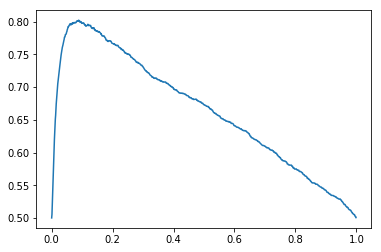

In [73]:
model = CatBoostClassifier(iterations=2000,
                   eval_metric='AUC',
                   depth=6, 
                   learning_rate=0.5, 
                   loss_function='Logloss', 
                )
#train the model
model.fit(X, y)
preds_proba = model.predict_proba(test_data)
val_pred= np.array(preds_proba)[:,1]
roc_auc=roc_auc_calc(val_pred)


Text(0.5, 0, 'Predicted probabilites')

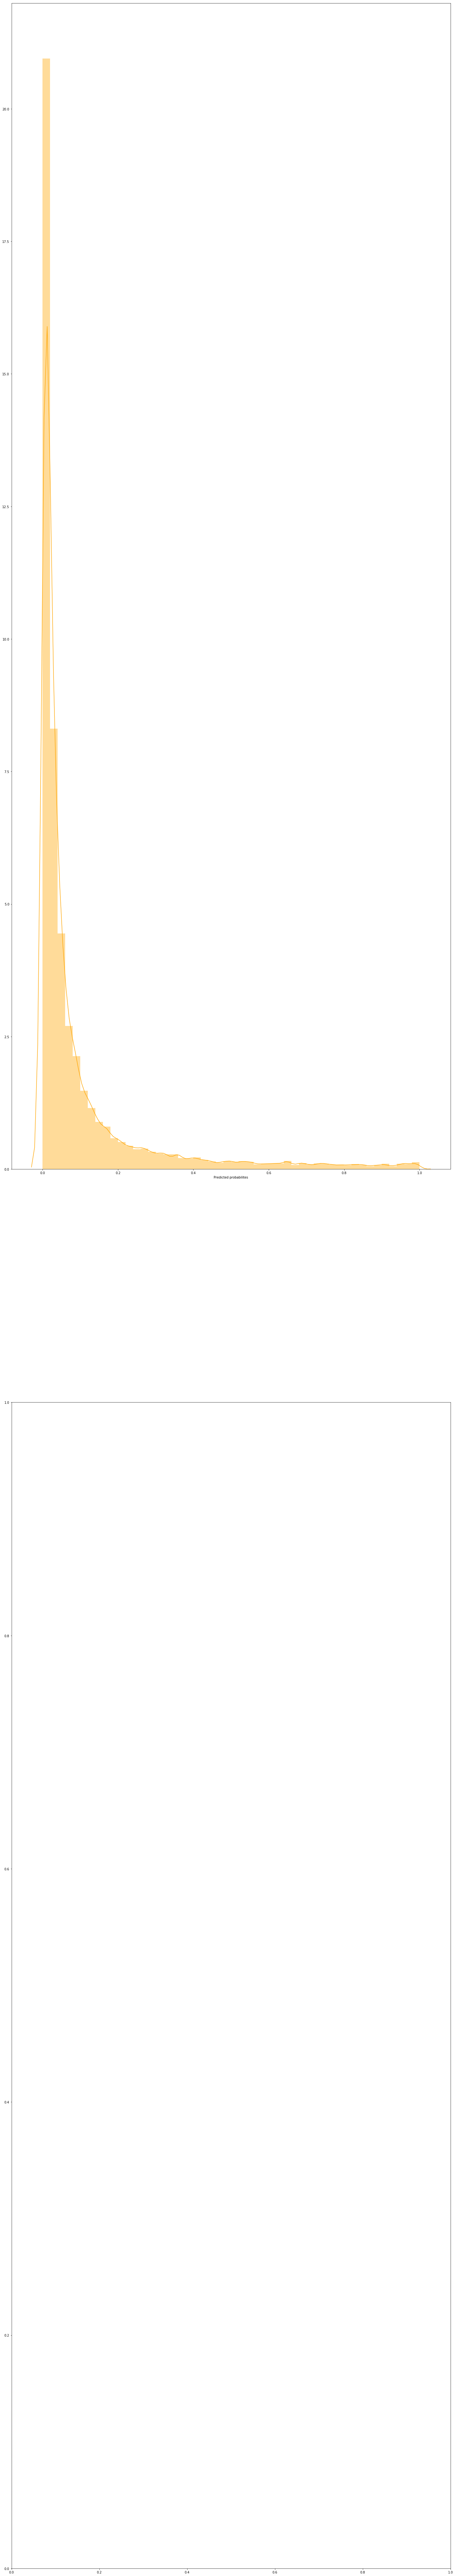

In [74]:
import seaborn as sns
fig, ax = plt.subplots(2,1,figsize=(25,150))
sns.distplot(val_pred, color="Orange", ax=ax[0])
ax[0].set_xlabel("Predicted probabilites")
# sns.distplot(improved_proba_predictions.values[:,1], color="Purple", ax=ax[1])
# ax[1].set_xlabel("Predicted probabilites of {}".format(improved_proba_predictions.columns.values[1]))
# ax[1]

In [57]:
def roc_auc_calc(val_pred):
    rng = np.arange(0, 1, 0.001)
    f1s = np.zeros((rng.shape[0]))
    for j,t in enumerate(tqdm(rng)):
        p = np.array(val_pred>t, dtype=np.int8)
        scoref1 = roc_auc_score(y_val, p)
        f1s[j] = scoref1
    plt.plot(rng, f1s)
    T = rng[np.where(f1s == np.max(f1s))[0]]
    print('Probability threshold maximizing CV F1-score for each class:')
    print(T, np.max(f1s))
    return np.max(f1s)


100%|██████████| 1000/1000 [00:01<00:00, 511.92it/s]

Probability threshold maximizing CV F1-score for each class:
[0.084] 0.7929639797479078


0.7929639797479078

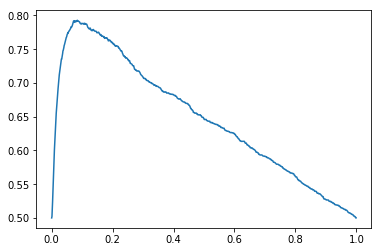

In [58]:
roc_auc_calc(val_pred)


In [75]:
predictions = np.array(model.predict_proba(test))[:,1]

In [78]:
predictions

array([0.07409841, 0.31139145, 0.40010195, ..., 0.00432717, 0.06137904,
       0.03486374])

In [79]:
res=pandas.DataFrame({'ID_code':list(ID_code),'target':predictions})

In [80]:
res.to_csv("answer_cat_200_6_05.csv",index=False)

In [84]:
!kaggle competitions submit -c santander-customer-transaction-prediction -f answer_cat_200_6_05.csv -m " cat boost 200 6 lr=0.5 auc_roc_score 0.8022810413446702"

100%|██████████████████████████████████████| 6.07M/6.07M [00:05<00:00, 1.18MB/s]
Successfully submitted to Santander Customer Transaction Prediction